Includes all the import statements


In [100]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading out database from our Github repo

In [101]:
url = "https://github.com/PranavKulkarni33/EECS3401-Group-Project/raw/main/healthcare.csv"
dataset = pd.read_csv(url)

Creating backup

In [102]:
dataset_backup = dataset

Creating Backup

In [103]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [104]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [105]:
dataset.shape

(5110, 12)

TASK 4 - PREPARE THE DATA FOR MACHINE LEARNING ALGORITHMS

4.1 - Check for duplicate rows and remove them if any

In [106]:
dataset.duplicated().sum()

0

There are zero duplicated rows and so nothing to delete

4.2 - Handle the missing values

First check if there are any missing values represented with a '?'

In [107]:
# choose which line to use
dataset.isin(['?']).sum(axis=0)
#(dataset.values == '?').sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

There are zero missing values represented with a '?', so there is nothing to replace with null (nan)

Next, handle the missing valies.

In [108]:
dataset.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are only 201 missing values in one column ("BMI"). WHAT DO WE WANT TO DO WITH THIS MISSING VALUES? DELETE COLUMN? DELETE THOSE 201 ROWS? OR FILL IT WITH THE MEAN?

4.3 - Create a pipeline

In [109]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [110]:
num_cols = dataset.select_dtypes(include='number').columns.to_list()
cat_cols = dataset.select_dtypes(exclude='number').columns.to_list()


# Exclude the target from numerical columns
num_cols.remove("stroke")

# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

# Use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

In [111]:
num_cols

['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [112]:
cat_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [113]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['id', 'age', 'hypertension', 'heart_disease',
                                  'avg_glucose_level', 'bmi']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type', 'smoking_status'])])

In [114]:
# Apply the preprocessing pipeline on the dataset

dataset_prepared = preprocessing.fit_transform(dataset)
feature_names=preprocessing.get_feature_names_out()
dataset_prepared = pd.DataFrame(data=dataset_prepared, columns=feature_names)

dataset_prepared.shape # column sizes have increased due to ONEHOTENCODER (originally look at line before Task 4) --> shows pipeline worked

(5110, 23)

In [115]:
dataset_prepared

,num__id,num__age,num__hypertension,num__heart_disease,num__avg_glucose_level,num__bmi,cat__gender_Female,cat__gender_Male,cat__gender_Other,cat__ever_married_No,...,cat__work_type_Private,cat__work_type_Self-employed,cat__work_type_children,cat__Residence_type_Rural,cat__Residence_type_Urban,cat__smoking_status_Unknown,cat__smoking_status_formerly smoked,cat__smoking_status_never smoked,cat__smoking_status_smokes,remainder__stroke
0,-1.298312,1.051434,-0.328602,4.185032,2.706375,1.001234e+00,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.716371,0.786070,-0.328602,-0.238947,2.121559,4.615554e-16,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.255478,1.626390,-0.328602,4.185032,-0.005028,4.685773e-01,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.118363,0.255342,-0.328602,-0.238947,1.437358,7.154182e-01,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,-1.647136,1.582163,3.043196,-0.238947,1.501184,-6.357112e-01,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,-0.864089,1.626390,3.043196,-0.238947,-0.494658,4.615554e-16,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5106,0.394863,1.670617,-0.328602,-0.238947,0.420775,1.442949e+00,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5107,-0.793720,-0.363842,-0.328602,-0.238947,-0.511443,2.217363e-01,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5108,0.048497,0.343796,-0.328602,-0.238947,1.328257,-4.278451e-01,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Below confirms that there are no null values, so our pipeline worked correctly

In [116]:
dataset_prepared.isna().sum()

num__id                                0
num__age                               0
num__hypertension                      0
num__heart_disease                     0
num__avg_glucose_level                 0
num__bmi                               0
cat__gender_Female                     0
cat__gender_Male                       0
cat__gender_Other                      0
cat__ever_married_No                   0
cat__ever_married_Yes                  0
cat__work_type_Govt_job                0
cat__work_type_Never_worked            0
cat__work_type_Private                 0
cat__work_type_Self-employed           0
cat__work_type_children                0
cat__Residence_type_Rural              0
cat__Residence_type_Urban              0
cat__smoking_status_Unknown            0
cat__smoking_status_formerly smoked    0
cat__smoking_status_never smoked       0
cat__smoking_status_smokes             0
remainder__stroke                      0
dtype: int64

Next, make sure target column ("Stroke") has only two categories (yes or no)

In [117]:
dataset["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

This confirms it only has two categories, as required, so we don't have to do any modifications

TASK 5 - SELECT A MODEL AND TRAIN IT

5.1 Split the dataset into a training dataset (80%) and testing dataset.

In [118]:
from sklearn.model_selection import train_test_split

X = dataset_prepared.drop(["remainder__stroke"], axis=1)
y = dataset_prepared["remainder__stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4088, 22) (4088,) (1022, 22) (1022,)


Train model #1: a svm model (svc)

In [119]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

model_svm = SVC(kernel='poly', C=0.1, gamma=1)
model_svm.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='poly')

<!-- Use GridSearchCV to find the best value of kernel, gamma, and C. -->

<!-- Split the dataset into 60% training, 20% validation, and 20% testing. -->

In [120]:
# X_train, X_validation_test, y_train, y_validation_test = train_test_split(X, y, test_size=0.4, random_state=42)

# X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)

# print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

Can deleete grid search cv because it should be behind the scenes
<!-- Pass all the following hyperparameters for the GridSearchCV to find the best ones -->

In [121]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# svm_parameters = {'kernel': ['rbf', 'linear', 'poly'],
#                   'C': [0.01, 0.1, 1, 10],
#                   'gamma': [0.01, 1, 10]
#                 }

# svm = SVC()
# svm_gs = GridSearchCV(estimator = svm,
#                       param_grid = svm_parameters)
# svm_gs.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

# model_svm = svm_gs.best_estimator_
# model_svm.score(X_validation, y_validation)

In [122]:
# model_svm.get_params() # not doing model_svm because want to see which kernel it is too

In [123]:
# model_svm

In [124]:
# from sklearn.model_selection import train_test_split

# X = dataset_prepared.drop(["remainder__stroke"], axis=1)
# y = dataset_prepared["remainder__stroke"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Train model #2: a Logistic Regression model

In [125]:
# got this code from https://www.datacamp.com/tutorial/understanding-logistic-regression-python

from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(random_state=16)
model_logreg.fit(X_train, y_train)

LogisticRegression(random_state=16)

Train Model #3: Decision Tree

In [126]:
# got this code from https://www.datacamp.com/tutorial/decision-tree-classification-python

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

#Create Decision Tree classifier object
model_dectree = DecisionTreeClassifier()
model_dectree.fit(X_train,y_train)


DecisionTreeClassifier()

Classification Reports

In [127]:
from sklearn.metrics import classification_report

In [128]:
svm_y_predict = model_svm.predict(X_test)
print(classification_report(y_test, svm_y_predict))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       960
         1.0       0.20      0.13      0.16        62

    accuracy                           0.91      1022
   macro avg       0.57      0.55      0.56      1022
weighted avg       0.90      0.91      0.91      1022



In [129]:
logreg_y_predict = model_logreg.predict(X_test)
print(classification_report(y_test, logreg_y_predict))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       960
         1.0       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/Users/aacellular/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aacellular/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aacellular/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
dectree_y_predict = model_dectree.predict(X_test)
print(classification_report(y_test, dectree_y_predict))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       960
         1.0       0.16      0.11      0.13        62

    accuracy                           0.91      1022
   macro avg       0.55      0.54      0.54      1022
weighted avg       0.90      0.91      0.90      1022



Evaluate all 4 models using cross validation with cv = 5

In [131]:
from sklearn.model_selection import cross_val_predict, cross_val_score


In [132]:
svm_scores = cross_val_score(model_svm, X_train, y_train, cv=5)
svm_scores

array([0.92665037, 0.92787286, 0.92665037, 0.91676867, 0.9253366 ])

In [133]:
logreg_scores = cross_val_score(model_logreg, X_train, y_train, cv=5)
logreg_scores

array([0.95476773, 0.95354523, 0.95354523, 0.95593635, 0.95471236])

In [134]:
dectree_scores = cross_val_score(model_dectree, X_train, y_train, cv=5)
dectree_scores

array([0.900978  , 0.91320293, 0.90464548, 0.92044064, 0.90575275])

In [135]:
print(f'SVM Model Cross-Validation Mean Accuracy: {svm_scores.mean()}')
print(f'Logistic Regression Model Cross-Validation Mean Accuracy: {logreg_scores.mean()}')
print(f'Decision Tree Cross-Validation Mean Accuracy: {dectree_scores.mean()}')

SVM Model Cross-Validation Mean Accuracy: 0.9246557714579848
Logistic Regression Model Cross-Validation Mean Accuracy: 0.9545013811038656
Decision Tree Cross-Validation Mean Accuracy: 0.9090039592641693


Actual for the best performing model, highest accuracy score

In [136]:
model_logreg

LogisticRegression(random_state=16)

Print Classification Report

In [137]:
bestmodel_y_predict = model_logreg.predict(X_test)

print(classification_report(y_test, bestmodel_y_predict))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       960
         1.0       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/Users/aacellular/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aacellular/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aacellular/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Print Confusion Matrix Display

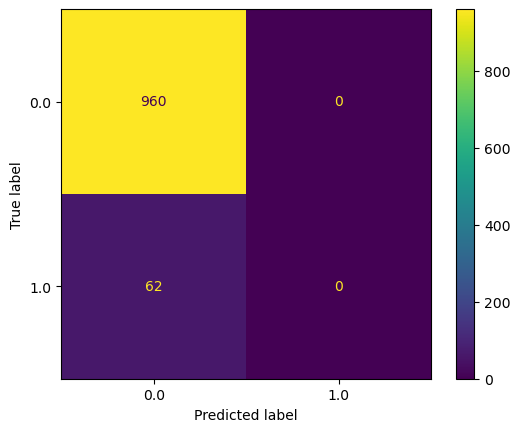

In [138]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, bestmodel_y_predict)

In [139]:
from sklearn.metrics import accuracy_score   

score = accuracy_score(y_test, bestmodel_y_predict)
print(score)

0.9393346379647749
